Minimal estimation error derived from "Derivation of Human Chromatic Discrimination Ability from an Information-Theoretical Notion of Distance in Color Space" 

- NECO: doi:10.1162/NECO_a_00903
- ARXIV: arXiv:1611.07272

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 

In [2]:
# fitted data for the Quantal cone fundamentals (figure 2)

lS = 442.1
lM = 542.8
lL = 568.2
sS = 32.96
sM = 52.8
sL = 64.76

In [3]:
def I(l,lS,lM,lL,sS,sM,sL,bS,bM,bL,I):
    term1 = bS * ((l - lS) * (l - lS) * np.exp(-(l - lS) * (l - lS) / np.power(sS, 2))) / np.power(sS, 4)
    term2 = bM * ((l - lM) * (l - lM) * np.exp(-(l - lM) * (l - lM) / np.power(sM, 2))) / np.power(sM, 4)
    term3 = bL * ((l - lL) * (l - lL) * np.exp(-(l - lL) * (l - lL) / np.power(sL, 2))) / np.power(sL, 4)

    result = 4*I*(term1 + term2 + term3)
    return 1/np.sqrt(result)

In [4]:
x = np.arange(380, 700, 5)
y1 = [I(l,lS,lM,lL,sS,sM,sL,0.05,0.32,0.63,1000) for l in x]
y2 = [I(l,lS,lM,lL,sS,sM,sL,0.02,0.33,0.65,1000) for l in x]
y3 = [I(l,lS,lM,lL,sS,sM,sL,0.005,0.333,0.662,1000) for l in x]

Y = [y1,y2,y3]

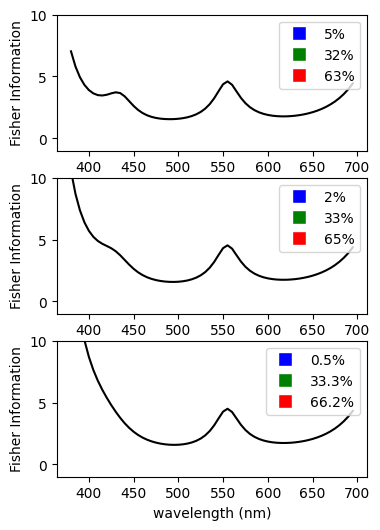

In [5]:
# Figure 4

labels = [('5%', '32%', '63%'),('2%','33%','65%'),('0.5%','33.3%','66.2%')]
colors = ['blue', 'green', 'red']

legend_handles = [Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10) for color in colors]

fig,ax = plt.subplots(3,figsize=(4,6))
for i in range(3):
    ax[i].plot(x,Y[i],color='k')
    ax[i].legend(handles=legend_handles, labels=labels[i])
    ax[i].set_ylim(-1,10)
    ax[i].set_ylabel('Fisher Information')
ax[2].set_xlabel('wavelength (nm)')
plt.show()